<a href="https://colab.research.google.com/github/yehiayaser/General-Deep-learning-Models/blob/main/Convolutional_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import keras
from keras import layers
import tensorflow as tf

# Load and normalize CIFAR-10 data
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Define the autoencoder model for CIFAR-10
input_img = keras.Input(shape=(32, 32, 3)) # CIFAR-10 images are 32x32x3

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (4, 4, 8) i.e. 128-dimensional (adjusted for pooling)

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
# Adjusted the last Conv2D layer to ensure output shape matches input
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x) # Output channels match input

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# You can now train the autoencoder using x_train and x_test
# autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

In [5]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 340ms/step - loss: 0.6139 - val_loss: 0.5905
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 333ms/step - loss: 0.5888 - val_loss: 0.5864
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 133s 341ms/step - loss: 0.5840 - val_loss: 0.5840
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 130s 331ms/step - loss: 0.5827 - val_loss: 0.5823
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 143s 335ms/step - loss: 0.5816 - val_loss: 0.5817
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 129s 331ms/step - loss: 0.5800 - val_loss: 0.5805
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 337ms/step - loss: 0.5797 - val_loss: 0.5802
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 139s 330ms/step - loss: 0.5790 - val_loss: 0.5791
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 336ms/step - loss: 0.5785 - val_loss: 0.5788
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 132s 336ms/step - loss: 0.5778 - val_loss: 0.5779


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


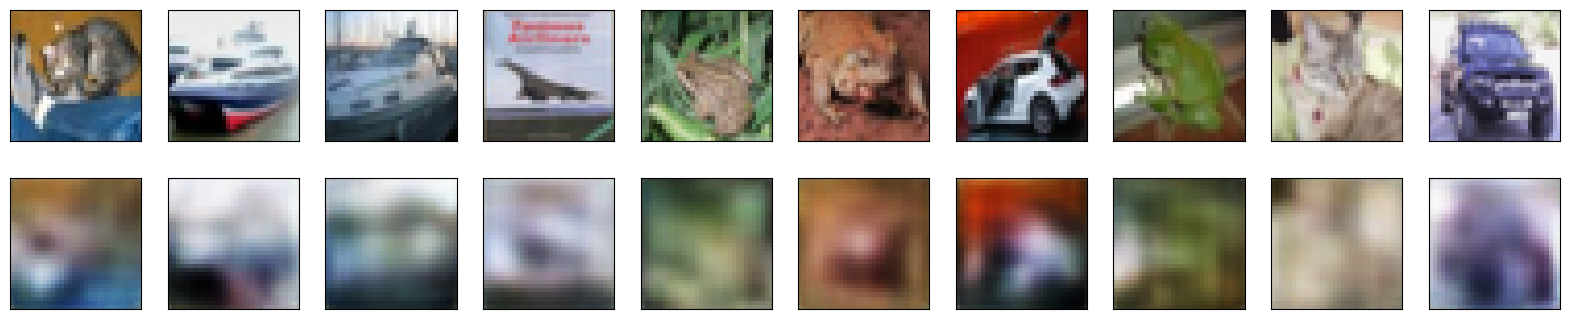

In [6]:
import matplotlib.pyplot as plt

# Use the autoencoder to reconstruct images from the test set
decoded_imgs = autoencoder.predict(x_test)

# Display original and reconstructed images
n = 10  # How many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()